In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from sklearn. feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
Categorical_col = df.select_dtypes(['object']).columns
Categorical_col

Index(['Department', 'salary'], dtype='object')

In [5]:
df[Categorical_col].nunique()

Department    10
salary         3
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_col = list(set(df.columns) - set(['left']))
y_col = 'left'
X = df[X_col]
y = df[y_col]

In [7]:
sm = {'low': 1,
      'medium':2,
      'high':3}
X['salary'] = X['salary'].map(sm)
X = pd.get_dummies(X,['Department'])
X.columns

Index(['time_spend_company', 'last_evaluation', 'average_montly_hours',
       'salary', 'promotion_last_5years', 'number_project', 'Work_accident',
       'satisfaction_level', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [8]:
X_col=list(X.columns)

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
sc.fit(X)
X = sc.transform(X)

## Feature Importance

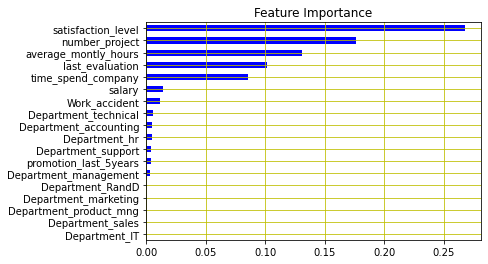

In [10]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X_col).sort_values()

feat_importances.plot (kind='barh', color = 'blue')
plt.title('Feature Importance')
plt.grid(color='y')
plt.show()

# Logistic Regression

## Selecting Best Train-Test Split using Cross Validation for Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,X,y,cv=10)
scores

array([0.80866667, 0.79266667, 0.79933333, 0.788     , 0.808     ,
       0.81      , 0.79533333, 0.792     , 0.74733333, 0.73515677])

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    model = LogisticRegression()
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) >= 0.80 :
        print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.score(X_test,y_test),3),round(model.score(X_train,y_train),3),counter))

Test Score 0.809, Train Score 0.795 for Sample Split 5
Test Score 0.809, Train Score 0.794 for Sample Split 7


In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==7 :
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [15]:
prob1 = log_reg.predict_proba(X_test)
prob1.shape

(1500, 2)

In [16]:
pr_test = log_reg.predict(X_test)
pr_train = log_reg.predict(X_train)

## Validating the Logistic Regression model results

AUC:  0.8331919800140928


Text(0.5, 1.0, 'ROC')

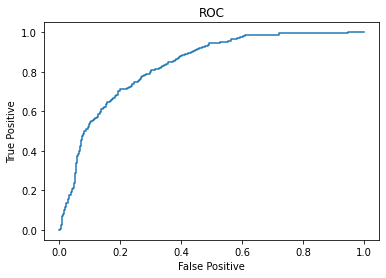

In [17]:
fpr,tpr,threshold = roc_curve(y_test,prob1[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

In [18]:
# test data
print('************Accuracy_Score*************')
print(accuracy_score(y_test,pr_test))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_test,pr_test))
print('********Classification_report**********')
print(classification_report(y_test,pr_test))

************Accuracy_Score*************
0.8093333333333333
**********Confusion_matrix*************
[[1097   68]
 [ 218  117]]
********Classification_report**********
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1165
           1       0.63      0.35      0.45       335

    accuracy                           0.81      1500
   macro avg       0.73      0.65      0.67      1500
weighted avg       0.79      0.81      0.79      1500



# DecisionTree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8) 

## Selecting Best Train-Test Split using Cross Validation for DecisionTree Classifier

In [20]:
scores = cross_val_score(dt,X,y,cv=10)
scores

array([0.986     , 0.98133333, 0.97866667, 0.976     , 0.97466667,
       0.97733333, 0.98533333, 0.97733333, 0.98533333, 0.98332221])

In [21]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) >= 0.985 :
        print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.score(X_test,y_test),3),round(model.score(X_train,y_train),3),counter))

Test Score 0.987, Train Score 1.0 for Sample Split 10


In [22]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==10 :
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]

## Hyperparameter Tuning for DecisionTreeClassifier

In [23]:
parameters = {"max_depth" : [5,10,15,20],
             "criterion" : ['entropy', 'gini']
             }

#GridSearch Check
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                 param_grid=parameters,
                 scoring="recall",
                 cv=5)

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20]},
             scoring='recall')

In [25]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [26]:
dt = DecisionTreeClassifier(max_depth = 20,criterion = 'entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

## Validating the DecisionTree model results

AUC:  0.9864018024229292


Text(0.5, 1.0, 'ROC')

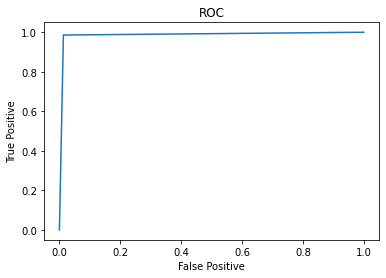

In [27]:
prob = dt.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,prob[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

In [28]:
pr_test = dt.predict(X_test)
pr_train = dt.predict(X_train)

# test data
print('************Test Data*************')
print('************Accuracy_Score*************')
print(accuracy_score(y_test,pr_test))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_test,pr_test))
print('********Classification_report**********')
print(classification_report(y_test,pr_test))
print('***************************************')
print('************Train Data*************')
# train data
print('************Accuracy_Score*************')
print(accuracy_score(y_train,pr_train))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_train,pr_train))
print('********Classification_report**********')
print(classification_report(y_train,pr_train))

************Test Data*************
************Accuracy_Score*************
0.9866577718478986
**********Confusion_matrix*************
[[1129   15]
 [   5  350]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1144
           1       0.96      0.99      0.97       355

    accuracy                           0.99      1499
   macro avg       0.98      0.99      0.98      1499
weighted avg       0.99      0.99      0.99      1499

***************************************
************Train Data*************
************Accuracy_Score*************
1.0
**********Confusion_matrix*************
[[10284     0]
 [    0  3216]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10284
           1       1.00      1.00      1.00      3216

    accuracy                           1.00     13500
   macro avg       1.00

# Random Forest

## Selecting Best Train-Test Split using Cross Validation for RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 4,criterion = 'entropy')
scores = cross_val_score(rf,X,y,cv=10)
scores

array([0.92866667, 0.90933333, 0.91266667, 0.91533333, 0.91666667,
       0.92733333, 0.914     , 0.92066667, 0.91866667, 0.91994663])

In [30]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) >= 0.995 :
        print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.score(X_test,y_test),3),round(model.score(X_train,y_train),3),counter))

In [31]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==5 :
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]

## Hyperparameter Tuning for RandomForestClassifier

In [32]:
parameters = {"n_estimators":[50,100,110],
             "max_depth" : [5,10,15,20],
             "criterion" : ['entropy', 'gini']
             }

#GridSearch Check
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,
                 scoring="recall",
                 cv=5)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 110]},
             scoring='recall')

In [34]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20)

In [35]:
rf = RandomForestClassifier(n_estimators = 110 ,max_depth = 20,criterion = 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=110)

## Validating the RandomForestClassification model results

AUC:  0.9970978115930662


Text(0.5, 1.0, 'ROC')

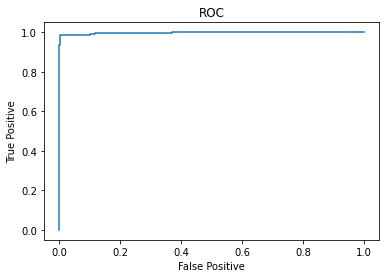

In [36]:
prob2 = rf.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,prob2[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

In [37]:
pr_test = rf.predict(X_test)
pr_train = rf.predict(X_train)

# test data
print('************Test Data*************')
print('************Accuracy_Score*************')
print(accuracy_score(y_test,pr_test))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_test,pr_test))
print('********Classification_report**********')
print(classification_report(y_test,pr_test))
print('***************************************')
print('************Train Data*************')
# train data
print('************Accuracy_Score*************')
print(accuracy_score(y_train,pr_train))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_train,pr_train))
print('********Classification_report**********')
print(classification_report(y_train,pr_train))

************Test Data*************
************Accuracy_Score*************
0.9946666666666667
**********Confusion_matrix*************
[[1156    3]
 [   5  336]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       0.99      0.99      0.99       341

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

***************************************
************Train Data*************
************Accuracy_Score*************
0.999481443069857
**********Confusion_matrix*************
[[10263     6]
 [    1  3229]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10269
           1       1.00      1.00      1.00      3230

    accuracy                           1.00     13499
   macro 

# XGBoost

## Selecting Best Train-Test Split using Cross Validation for XGBoost Classifier

In [38]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
scores = cross_val_score(rf,X,y,cv=10)
scores

array([0.99866667, 0.99866667, 0.98266667, 0.97933333, 0.97533333,
       0.992     , 0.99866667, 0.99733333, 0.99933333, 0.99933289])

In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    model = XGBClassifier()
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) >= 0.99 :
        print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.score(X_test,y_test),3),round(model.score(X_train,y_train),3),counter))

Test Score 0.991, Train Score 0.997 for Sample Split 8
Test Score 0.991, Train Score 0.997 for Sample Split 10


In [40]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==10 :
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]

## Hyperparameter Tuning for XGBoostClassifier

In [41]:
parameters = {"n_estimators":[50,100,110],
             "max_depth" : [2,5,10,15,20],
             "learning_rate" : [0.01,0.05, 0.1]
             }

#GridSearch Check
grid_search = GridSearchCV(estimator=XGBClassifier(),
                 param_grid=parameters,
                 scoring="recall",
                 cv=5)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                 

In [43]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=110,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Validating the XGBClassification model results

In [44]:
xgbc = XGBClassifier(n_estimators = 100,max_depth=30,learning_rate=0.1,n_jobs=-1)
xgbc.fit(X_train,y_train)
pr_train = xgbc.predict(X_train)
pr_test = xgbc.predict(X_test)

# test data
print('************Test Data*************')
print('************Accuracy_Score*************')
print(accuracy_score(y_test,pr_test))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_test,pr_test))
print('********Classification_report**********')
print(classification_report(y_test,pr_test))
print('***************************************')
print('************Train Data*************')
# train data
print('************Accuracy_Score*************')
print(accuracy_score(y_train,pr_train))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_train,pr_train))
print('********Classification_report**********')
print(classification_report(y_train,pr_train))


************Test Data*************
************Accuracy_Score*************
0.9946631087391594
**********Confusion_matrix*************
[[1141    3]
 [   5  350]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       0.99      0.99      0.99       355

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499

***************************************
************Train Data*************
************Accuracy_Score*************
0.9994814814814815
**********Confusion_matrix*************
[[10282     2]
 [    5  3211]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10284
           1       1.00      1.00      1.00      3216

    accuracy                           1.00     13500
   macro

AUC:  0.995976558652615


Text(0.5, 1.0, 'ROC')

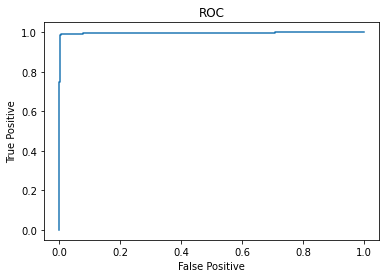

In [45]:
prob3 = xgbc.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,prob3[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

# AdaBoost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

## Selecting Best Train-Test Split using Cross Validation for RandomForestClassifier

In [47]:
scores = cross_val_score(ada,X,y,cv=10)
scores

array([0.96133333, 0.956     , 0.96066667, 0.956     , 0.95      ,
       0.95666667, 0.96133333, 0.95733333, 0.972     , 0.96531021])

In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    model = AdaBoostClassifier()
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) >= 0.96 :
        print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.score(X_test,y_test),3),round(model.score(X_train,y_train),3),counter))

Test Score 0.967, Train Score 0.96 for Sample Split 1
Test Score 0.961, Train Score 0.96 for Sample Split 5
Test Score 0.961, Train Score 0.962 for Sample Split 9
Test Score 0.965, Train Score 0.957 for Sample Split 10


In [49]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==10 :
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]

## Hyperparameter Tuning for AdaBoostClassifier

In [50]:
parameters = {"n_estimators":[50,100,110],
             "learning_rate" : [0.01,0.05, 0.1,1]
             }

#GridSearch Check
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                 param_grid=parameters,
                 scoring="recall",
                 cv=5)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [50, 100, 110]},
             scoring='recall')

In [52]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=110)

## Validating the AdaBoostClassification model results

In [53]:
ada = AdaBoostClassifier(n_estimators = 100,learning_rate=1)
ada.fit(X_train,y_train)
pr_train = xgbc.predict(X_train)
pr_test = xgbc.predict(X_test)

# test data
print('************Test Data*************')
print('************Accuracy_Score*************')
print(accuracy_score(y_test,pr_test))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_test,pr_test))
print('********Classification_report**********')
print(classification_report(y_test,pr_test))
print('***************************************')
print('************Train Data*************')
# train data
print('************Accuracy_Score*************')
print(accuracy_score(y_train,pr_train))
print('**********Confusion_matrix*************')
print(confusion_matrix(y_train,pr_train))
print('********Classification_report**********')
print(classification_report(y_train,pr_train))


************Test Data*************
************Accuracy_Score*************
0.9946631087391594
**********Confusion_matrix*************
[[1141    3]
 [   5  350]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       0.99      0.99      0.99       355

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499

***************************************
************Train Data*************
************Accuracy_Score*************
0.9994814814814815
**********Confusion_matrix*************
[[10282     2]
 [    5  3211]]
********Classification_report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10284
           1       1.00      1.00      1.00      3216

    accuracy                           1.00     13500
   macro

AUC:  0.995976558652615


Text(0.5, 1.0, 'ROC')

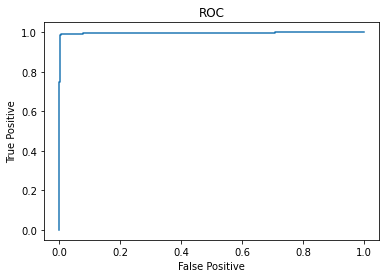

In [54]:
prob4 = xgbc.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,prob4[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

In [55]:
probf = (log_reg.predict_proba(X_test)+rf.predict_proba(X_test)+xgbc.predict_proba(X_test)+ada.predict_proba(X_test)+dt.predict_proba(X_test))/5

AUC:  0.9997316064217472


Text(0.5, 1.0, 'ROC')

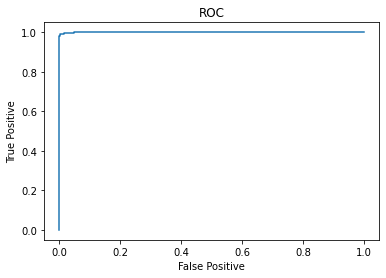

In [56]:
fpr,tpr,threshold = roc_curve(y_test,probf[:,1])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

# ANN

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense( units =6  , activation= 'relu' , input_shape= (18,) ))
model.add(tf.keras.layers.Dense( units =6 , activation= 'relu' ))
model.add(tf.keras.layers.Dense( units =6 , activation= 'relu' ))

model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))


In [58]:
class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_recall"]
        train_score = logs["recall"]
        if test_score > train_score and test_score > self.cl:
            self.model.stop_training = True
        '''if test_score == self.cl:
            self.model.stop_training = True'''

In [59]:
import tensorflow_addons as tfa

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="binary_crossentropy" , metrics=['Recall'])

In [60]:
model.fit(X_train,y_train, epochs=200 , validation_data=(X_test,y_test),callbacks=[MyThresholdCallBack(cl=0.98)])

Epoch 1/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6039 - recall: 0.0283 - val_loss: 0.5556 - val_recall: 0.0000e+00
Epoch 2/200
422/422 [==============================] - 0s 1ms/step - loss: 0.5510 - recall: 0.0000e+00 - val_loss: 0.5467 - val_recall: 0.0000e+00
Epoch 3/200
422/422 [==============================] - 0s 1ms/step - loss: 0.5471 - recall: 0.0000e+00 - val_loss: 0.5443 - val_recall: 0.0000e+00
Epoch 4/200
422/422 [==============================] - 0s 1ms/step - loss: 0.5447 - recall: 0.0000e+00 - val_loss: 0.5420 - val_recall: 0.0000e+00
Epoch 5/200
422/422 [==============================] - 1s 1ms/step - loss: 0.5421 - recall: 0.0000e+00 - val_loss: 0.5395 - val_recall: 0.0000e+00
Epoch 6/200
422/422 [==============================] - 1s 1ms/step - loss: 0.5393 - recall: 0.0000e+00 - val_loss: 0.5368 - val_recall: 0.0000e+00
Epoch 7/200
422/422 [==============================] - 0s 1ms/step - loss: 0.5359 - recall: 0.0000e+00 - val_loss: 0.5333 

In [61]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.1250 - recall: 0.9239


[0.12495655566453934, 0.9239436388015747]

47/47 [==============================] - 0s 1ms/step
AUC:  0.977969565645622


Text(0.5, 1.0, 'ROC')

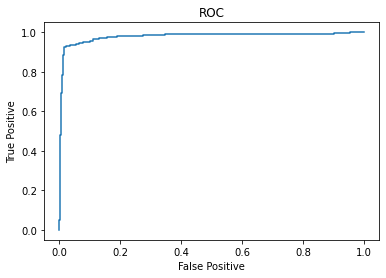

In [62]:
prob = model.predict(X_test)#(model.predict(Xt) > 0.5).astype("int32")
fpr,tpr,threshold = roc_curve(y_test,prob[:,0])
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

# Deploying the Models

In [63]:
import pickle
pickle.dump(log_reg,open("lr_model.pkl","wb"))
pickle.dump(dt,open("dt_model.pkl","wb"))
pickle.dump(rf,open("rf_model.pkl","wb"))
pickle.dump(ada,open("ada_model.pkl","wb"))
pickle.dump(xgbc,open("xgb_model.pkl","wb"))

pickle.dump(sc,open("scalar.std","wb"))